# Introduction to Pytorch library and gradient descent algorithm
Diane Lingrand (diane.lingrand@univ-cotedazur)

Université Côte d'Azur

Polytech Nice Sophia

SI4 - 2024-2025

In [1]:
import numpy as np
import torch
torch.__version__
import matplotlib.pyplot as plt

# Introduction to pytorch tensors and operations

## Variables of different types and shapes

### scalar values
Let's create a simple integer of value 2.

In [2]:
a = torch.tensor(2)

In [3]:
print('nb dim = ', a.dim(), '\n shape = ',a.shape, '\n dtype = ', a.dtype, '\n value = ', a.item())

nb dim =  0 
 shape =  torch.Size([]) 
 dtype =  torch.int64 
 value =  2


<b><font color='purple'>Question:</font></b> Construct also a single float.

### vectors
Let's now create a simple vector of 3 floats!

In [4]:
# one solution

b = torch.tensor([2.1, 7.5, 3])

In [5]:
print('nb dim = ', b.dim(), '\n shape = ',b.shape, '\n dtype = ', b.dtype)

nb dim =  1 
 shape =  torch.Size([3]) 
 dtype =  torch.float32


🤔 <b><font color='purple'>Question:</font></b> Construct also a vector of 4 integers.

In [235]:
# one solution

b_bis = torch.tensor([4,7,12,27])

In [236]:
print('nb dim = ', b_bis.dim(), '\n shape = ',b_bis.shape, '\n dtype = ', b_bis.dtype)

nb dim =  1 
 shape =  torch.Size([4]) 
 dtype =  torch.int64


### matrix or 2d-array
A small 2d array of integers:

In [6]:
c = torch.tensor([[2, 7, 3],[1,4,9]])

In [7]:
print('nb dim = ', c.dim(), '\n shape = ',c.shape, '\n dtype = ', c.dtype)

nb dim =  2 
 shape =  torch.Size([2, 3]) 
 dtype =  torch.int64


🤔 <b><font color='purple'>Question:</font></b> Build a small grey levels picture

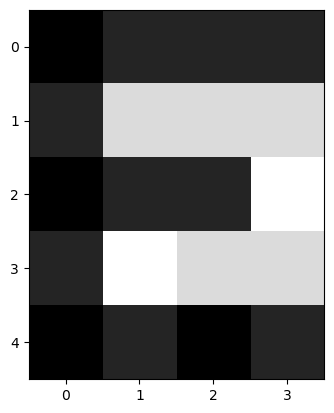

In [221]:
# one solution

img = torch.tensor([[10,20,20,20],[20,70,70,70],[10,20,20,80],[20,80,70,70],[10,20,10,20]])
plt.imshow(img, cmap="gray")

### tensor or nd-array ($n>2$)
A 3d array:

In [8]:
d = torch.tensor([[[2, 7, 3, 6],
                   [1, 4, 9, 11]],
                  [[5, 4, 0, 6],
                   [10, 8, 1, 3]],
                  [[3, 6, 2, 8],
                   [9, 1, 2, 7]]])
print(d)

tensor([[[ 2,  7,  3,  6],
         [ 1,  4,  9, 11]],

        [[ 5,  4,  0,  6],
         [10,  8,  1,  3]],

        [[ 3,  6,  2,  8],
         [ 9,  1,  2,  7]]])


In [9]:
print('nb dim = ', d.dim(), '\n shape = ',d.shape, '\n dtype = ', d.dtype)

nb dim =  3 
 shape =  torch.Size([3, 2, 4]) 
 dtype =  torch.int64


🤔 <b><font color='purple'>Question:</font></b> Build a small colored picture

nb dim =  3 
 shape =  torch.Size([3, 3, 3]) 
 dtype =  torch.int64
tensor([  0,   0, 200])


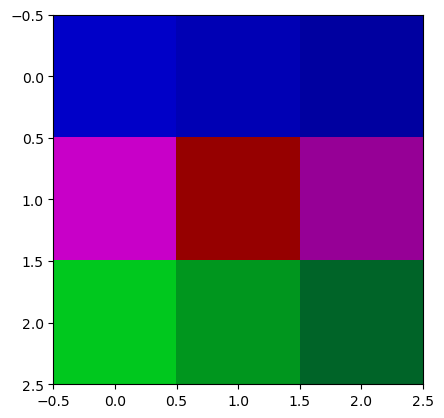

In [294]:
# one solution

img_colored = torch.tensor([[[0,0,200],[0,0,180],[0,0,160]], [[200,0,200],[150,0,0],[150,0,150]],[[0,200,30],[0,150,30],[0,100,40]]])
plt.imshow(img_colored)
print('nb dim = ', img_colored.dim(), '\n shape = ',img_colored.shape, '\n dtype = ', img_colored.dtype)
print(img_colored[0][0])

## Variables: device

In [10]:
# default device
print("d is stored on device: ", d.device)

d is stored on device:  cpu


In [11]:
# making the code device agnostic
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [12]:
torch.cuda.device_count()

1

In [13]:
# move the tensor d to the device
d_gpu = d.to(device)

In [14]:
print("d_gpu is stored on device: ", d_gpu.device)

d_gpu is stored on device:  cuda:0


🤔 <b><font color='purple'>Question:</font></b> Check if you have or not a GPU on your computer. You can also try, on google colab, to change the runtime to GPU or not GPU.

In [ ]:
# one solution
# run the previous cells

## Variables: creation

Documentation available on <a href="https://pytorch.org/docs/stable/torch.html#tensor-creation-ops">pytorch site</a>. Experiments other functions than these:

In [15]:
# zeros
z0 = torch.zeros(2,3)
print(z0) 
zc = torch.zeros_like(c)
print(zc)

tensor([[0., 0., 0.],
        [0., 0., 0.]])
tensor([[0, 0, 0],
        [0, 0, 0]])


In [16]:
# ones
z1 = torch.ones(3,4)
print(z1)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])


In [17]:
# linear
zl = torch.linspace(0,1,5)
print(zl)

tensor([0.0000, 0.2500, 0.5000, 0.7500, 1.0000])


In [18]:
# random
zr = torch.randint(0,10,(3,10))
print(zr)

tensor([[5, 3, 6, 8, 0, 8, 7, 7, 3, 7],
        [8, 4, 0, 6, 5, 4, 9, 2, 2, 7],
        [2, 9, 5, 2, 4, 9, 2, 6, 0, 5]])


In [19]:
# from and to numpy array
anArray = np.array([1,5,2,7])
aTensor = torch.from_numpy(anArray)
backToNumpy = aTensor.numpy()
print(anArray,aTensor,backToNumpy, sep='\n')

[1 5 2 7]
tensor([1, 5, 2, 7])
[1 5 2 7]


🤔 <b><font color='purple'>Question:</font></b> Create 2 color images of dimension (20x20): one with random pixels and the other one with color gradients.

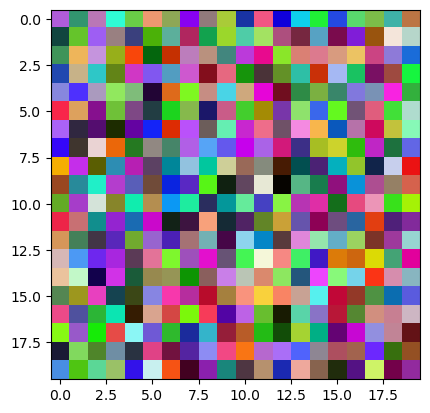

In [246]:
# one solution

random_img = torch.randint(0,255,(20,20,3))
plt.imshow(random_img)

torch.Size([20, 20, 3])
tensor([0.2770, 0.0000, 0.2244])


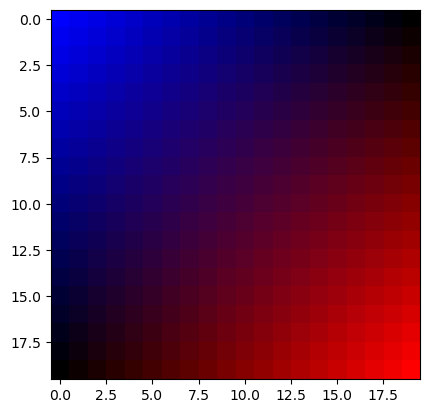

In [270]:
# one solution

red = torch.linspace(0,1,20)
red = red.unsqueeze(0)
red = torch.t(red)*red
blue = torch.linspace(1,0,20)
blue = blue.unsqueeze(0)
blue = torch.t(blue)*blue
green = torch.zeros_like(blue)
img = torch.dstack((red,green,blue))
print(img.shape)
print(img[10,10])
plt.imshow(img)

## Operations on tensors

Documentation on math operations on the <a href="https://pytorch.org/docs/stable/torch.html#math-operations">pytorch site</a>.

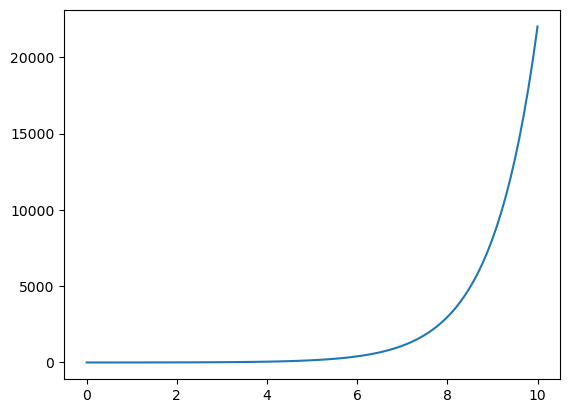

In [291]:
# back to first week in SI3 'données numériques'
def f(x):
    return torch.exp(x)

x = torch.linspace(0,10,100)
y = f(x)
plt.plot(x,y)

## Draw some normal vectors

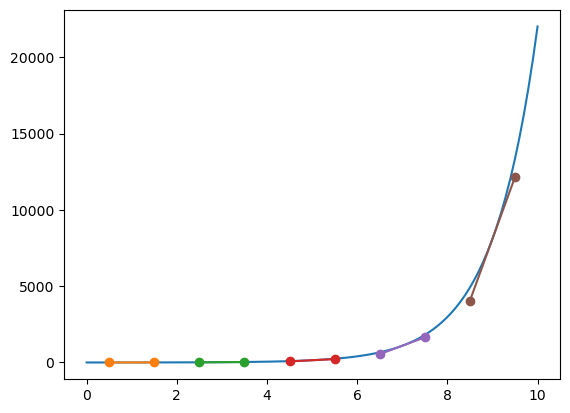

In [293]:
# this is almost what you have done in SI3 (except that it was using numpy)
# plot exp fn
x = torch.linspace(0,10,100)
y = f(x)
plt.plot(x,y)

# plot tangent at each xi
xi = torch.arange(1,11,2)
yi = f(xi)

# we use the fact that the derivative of exp is exp ( so that df/dx(xi)=f(xi)=yi )
x1 = xi-0.5
x2 = xi+0.5
y1 = yi*(x1-xi) + yi
y2 = yi*(x2-xi) + yi
plt.plot([x1, x2], [y1, y2], marker = 'o')

# Autograd

Automatic differentiation in pytorch.

## Draw the tangents using autograd
We ignore the fact that the derivative of exponential is the function itself. We also ignore the derivative of any functions. We will compute the derivatives of the function at each of the xi points in once. The forward pass computes the yi will the backward pass computes the derivatives.

Text(0.5, 1.0, 'curve and first derivatives')

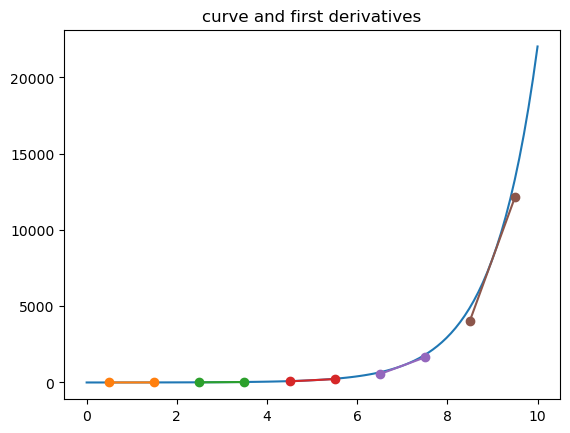

In [292]:
# plot exp fn
x = torch.linspace(0.0,10.0,100)
y = torch.exp(x)
plt.plot(x,y)

# plot tangent at each xi
xi = torch.arange(1.0,11.0,2.0)
xi.requires_grad_()
yi = torch.exp(xi)

# we explicitely compute the derivatives
yi.backward(torch.FloatTensor(np.ones(len(xi))))
dyi = xi.grad

# drawing as previously
x1 = xi-0.5
x2 = xi+0.5
y1 = dyi*(x1-xi) + yi
y2 = dyi*(x2-xi) + yi
x1np = x1.detach().numpy()
x2np = x2.detach().numpy()
y1np = y1.detach().numpy()
y2np = y2.detach().numpy()
plt.plot([x1np, x2np], [y1np, y2np], marker = 'o')
plt.title('curve and first derivatives')

### With another function (week 11 'données numériques')

In [298]:
def f(x):
    return x*x*x*x/4 - 8*x*x*x/3 + 19*x*x/2 - 12*x + 1

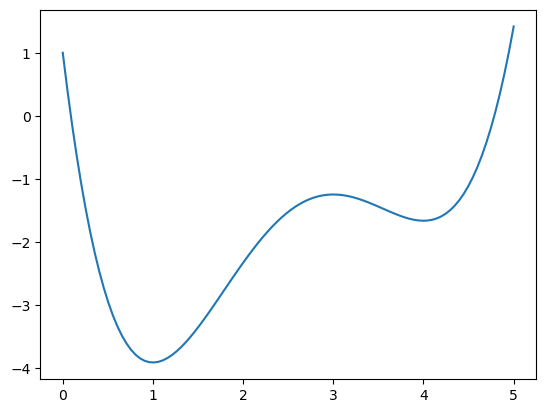

In [299]:
x = np.linspace(0,5,100)
y = f(x)
plt.plot(x,y)

🤔 <b><font color='purple'>Question:</font></b> Compute and plot the tangents as done for the previous function.

Text(0.5, 1.0, 'curve and first derivatives')

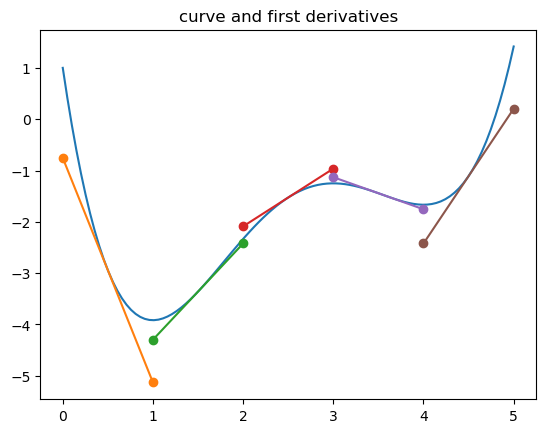

In [300]:
# one solution

# plot exp fn
x = torch.linspace(0.0,5.0,100)
y = f(x)
plt.plot(x,y)

# plot tangent at each xi
xi = torch.arange(0.5,5.0,1.0)
xi.requires_grad_()
yi = f(xi)

# we explicitely compute the derivatives
yi.backward(torch.FloatTensor(np.ones(len(xi))))
dyi = xi.grad

x1 = xi-0.5
x2 = xi+0.5
y1 = dyi*(x1-xi) + f(xi)
y2 = dyi*(x2-xi) + f(xi)
x1np = x1.detach().numpy()
x2np = x2.detach().numpy()
y1np = y1.detach().numpy()
y2np = y2.detach().numpy()

plt.plot([x1np, x2np], [y1np, y2np], marker = 'o')
plt.title('curve and first derivatives')

# Gradient descent using autograd

You already have this code in the slides:

In [301]:
theta = torch.tensor(0.2, requires_grad=True)
alpha = 0.01
limite = 100; epsilon = 0.01; cpt = 1

yi = f(theta)
yi.backward()
dyi = theta.grad 
with torch.no_grad():
    theta -= alpha*dyi
    
while (abs(dyi) > 0.01) and (cpt < limite):
    theta.grad.zero_()
    yi = f(theta)
    yi.backward()
    dyi = theta.grad 
    with torch.no_grad():
        theta -= alpha*dyi
    cpt += 1

print('min of f(x) obtained at iteration %d' %cpt)
print(' with x = %0.2f' %theta.item() , 'and min f(x) = %0.2f'%f(theta).item())

min of f(x) obtained at iteration 92
 with x = 1.00 and min f(x) = -3.92


🤔 <b><font color='purple'>Question:</font></b> Rewrite the same code with addition of plotting all the steps (as in slide 34).

stopping at grad = tensor(-0.0097) and iteration number  92


Text(0.5, 1.0, 'gradient descent')

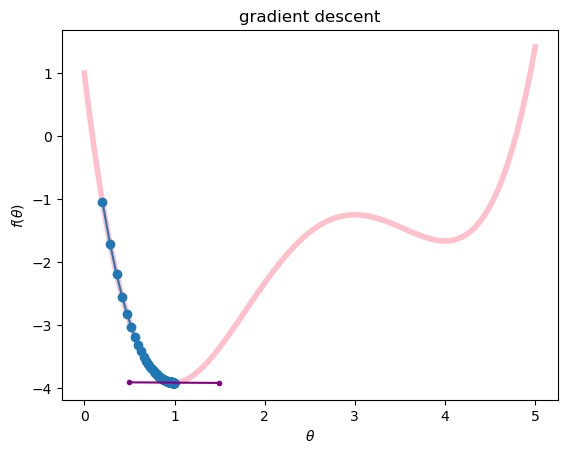

In [308]:
# one solution
theta = torch.tensor(0.2, requires_grad=True)
alpha = 0.01

limite=100
xdg = np.array([theta.detach()])
ydg = np.array([f(theta).detach()])
cpt = 1

# plot exp fn
x = np.linspace(0,5,100)
y = f(x)
plt.plot(x,y, color='pink',linewidth=4)

# first iteration before the loop

yi = f(theta)
yi.backward()
dyi = theta.grad
with torch.no_grad():
    theta -= alpha*dyi
xdg = np.append(xdg,theta.detach())
ydg = np.append(ydg,f(theta).detach())  

# all further iterations
while (abs(dyi) > 0.01) and (cpt < limite):
    theta.grad.zero_()
    yi = f(theta)
    yi.backward()
    dyi = theta.grad
    with torch.no_grad():
        theta -= alpha*dyi
    xdg = np.append(xdg,theta.detach())
    ydg = np.append(ydg,f(theta).detach())
    cpt += 1

print('stopping at grad =', dyi, 'and iteration number ', cpt)

# plot the points
plt.plot(xdg,ydg, marker = 'o')
xp = xdg[-1]
txp = torch.tensor(xp, requires_grad=True) 

yp = f(txp)

yp.backward()
dyp = txp.grad.detach().numpy()

yp = yp.detach().numpy()

# and plot the last tangent

x1 = xp - 0.5
x2 = xp + 0.5

y1 = dyp*(x1-xp) + yp
y2 = dyp*(x2-xp) + yp
plt.plot([x1, x2], [y1, y2], marker = '.', color='purple')
plt.xlabel('${\\theta}$')
plt.ylabel('$f(\\theta)$')
plt.title('gradient descent')

🤔 <b><font color='purple'>Question:</font></b> Experiment many starts and many learning rates. Remember some cases where:

<ul>
    <li>there is no convergence
    <li>there is convergence but to the local minimum
    <li>there is convergence to the global minimum but very slowly (remember the number of iterations)
</ul>

## Improving the gradient descent algorithms
### Variable learning rate
You have experimented that initialisation of variables ($\theta$ in our case) and learning rate ($\alpha$) are very important. 
In this section, we propose an improvement: 
<ul>
    <li>if the gradient is in the same direction for two consecutive iterations, probably we are not converging fast enough and the learning rate could increase ($\alpha$  *= $\gamma$)
    <li>if the gradient sign changes for two consecutive iterations, there are oscillations and the learning rate is probably too high: we then lower it ($\alpha$  /= $\gamma$)
</ul>
Play with different situations, different evolutions (the multiplication/division proposed using $\gamma > 1$ but not too big). You can start with $\gamma=1.2$ and try other values.

stopping at grad = tensor(0.0036) and iteration number  14


Text(0.5, 1.0, 'gradient descent')

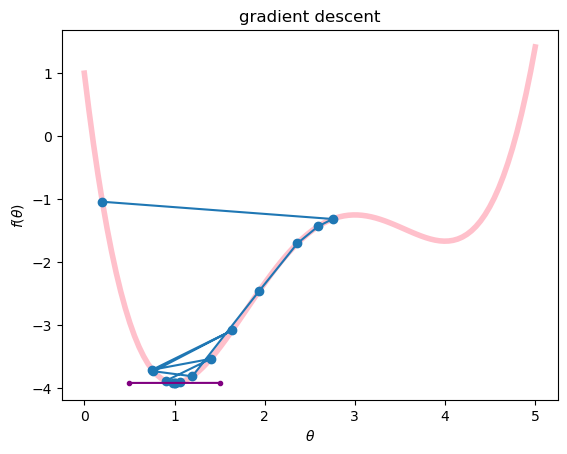

In [324]:
# one solution
theta = torch.tensor(0.2, requires_grad=True)
alpha = 0.3
gamma = 1.2

limite = 100
xdg = np.array([theta.detach()])
ydg = np.array([f(theta).detach()])
cpt = 1

# plot exp fn
x = np.linspace(0,5,100)
y = f(x)
plt.plot(x,y, color='pink',linewidth=4)

# first iteration before the loop

yi = f(theta)
yi.backward()
dyi = theta.grad
with torch.no_grad():
    theta -= alpha*dyi
xdg = np.append(xdg,theta.detach())
ydg = np.append(ydg,f(theta).detach())  
sign = +1 if dyi > 0 else -1

# all further iterations
while (abs(dyi) > 0.01) and (cpt < limite):
    theta.grad.zero_()
    yi = f(theta)
    yi.backward()
    dyi = theta.grad

    with torch.no_grad():
        theta -= alpha*dyi
    nsign = +1 if dyi > 0 else -1
    
    # next 5 lines could be before the last 3 lines
    if nsign*sign == 1:
        alpha = alpha*gamma
    else:
        alpha = alpha/gamma
    sign = nsign
    
    xdg = np.append(xdg,theta.detach())
    ydg = np.append(ydg,f(theta).detach())
 
    cpt += 1

print('stopping at grad =', dyi, 'and iteration number ', cpt)

# plot the points
plt.plot(xdg,ydg, marker = 'o')
xp = xdg[-1]
txp = torch.tensor(xp, requires_grad=True) 

yp = f(txp)

yp.backward()
dyp = txp.grad.detach().numpy()

yp = yp.detach().numpy()

# and plot the last tangent

x1 = xp - 0.5
x2 = xp + 0.5

y1 = dyp*(x1-xp) + yp
y2 = dyp*(x2-xp) + yp
plt.plot([x1, x2], [y1, y2], marker = '.', color='purple')
plt.xlabel('${\\theta}$')
plt.ylabel('$f(\\theta)$')
plt.title('gradient descent with variable learning rate')

### Momentum
The main idea is to add a quantity related to previous variation of $\theta$. Is it easier to converge towards a global minimum? Start at $\theta=4.99$ for example.

stopping at grad = tensor(-0.0038) and iteration number  338


Text(0.5, 1.0, 'gradient descent')

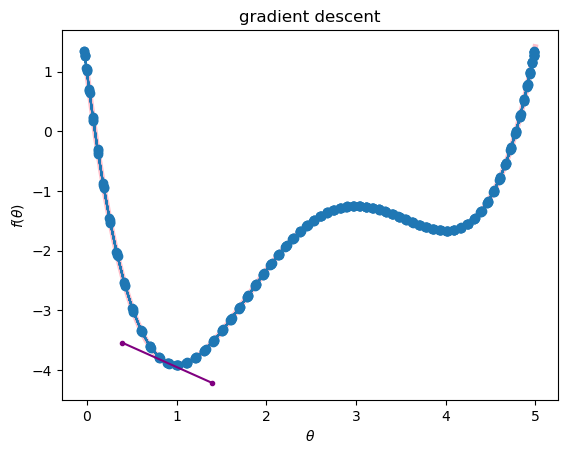

In [377]:
#one solution

theta = torch.tensor(4.99, requires_grad=True)
alpha = 0.001

limite = 1000
xdg = np.array([theta.detach()])
ydg = np.array([f(theta).detach()])
cpt = 1

# plot exp fn
x = np.linspace(0,5,100)
y = f(x)
plt.plot(x,y, color='pink',linewidth=4)

# first iteration before the loop

yi = f(theta)
yi.backward()
dyi = theta.grad
with torch.no_grad():
    theta -= alpha*dyi

momentum = - alpha*dyi

xdg = np.append(xdg,theta.detach())
ydg = np.append(ydg,f(theta).detach())  

# all further iterations
while (abs(dyi) > 0.01) and (cpt < limite):
    theta.grad.zero_()
    yi = f(theta)
    yi.backward()
    dyi = theta.grad
    with torch.no_grad():
        theta -= alpha*dyi - momentum
    momentum += - alpha*dyi 
    xdg = np.append(xdg,theta.detach())
    ydg = np.append(ydg,f(theta).detach())
    cpt += 1

print('stopping at grad =', dyi, 'and iteration number ', cpt)

# plot the points
plt.plot(xdg,ydg, marker = 'o')
xp = xdg[-1]
txp = torch.tensor(xp, requires_grad=True) 

yp = f(txp)

yp.backward()
dyp = txp.grad.detach().numpy()

yp = yp.detach().numpy()

# and plot the last tangent

x1 = xp - 0.5
x2 = xp + 0.5

y1 = dyp*(x1-xp) + yp
y2 = dyp*(x2-xp) + yp
plt.plot([x1, x2], [y1, y2], marker = '.', color='purple')
plt.xlabel('${\\theta}$')
plt.ylabel('$f(\\theta)$')
plt.title('gradient descent')

## Already finished?
Try all the previous ideas together!